# [**Régression isotonique**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data_science_practising/blob/main/Sklearn/examples/misc/plot_isotonic_regression.ipynb)<br/>([_Isotonic Regression_](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html))

Une illustration de la régression isotopique sur des données générées (tendance monotone non linéaire avec un bruit uniforme homoscédastique).

L'algorithme de régression isotopique trouve une approximation non décroissante d'une fonction tout en minimisant l'erreur quadratique moyenne sur les données d'entraînement. L'avantage d'un tel modèle non paramétrique est qu'il n'assume aucune forme particulière pour la fonction cible, à part la monotonie. À titre de comparaison, une régression linéaire est également présentée.

Le graphique du côté droit montre la fonction de prédiction du modèle qui résulte de l'interpolation linéaire des points de seuil. Les points de seuil sont un sous-ensemble des observations d'entrée d'entraînement, et leurs valeurs cibles correspondantes sont calculées par l'ajustement non paramétrique isotopique.

In [1]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))

Ajuster les modèles [**`IsotonicRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression) et [**`LinearRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression):

In [2]:
ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

LinearRegression()

Tracer les résultats :

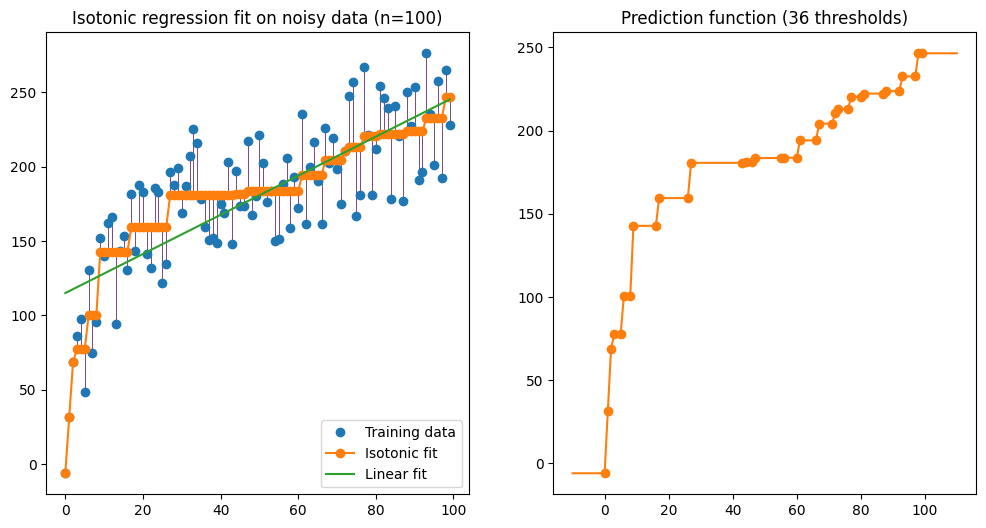

In [3]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 6))

ax0.plot(x, y, "C0.", markersize=12)
ax0.plot(x, y_, "C1.-", markersize=12)
ax0.plot(x, lr.predict(x[:, np.newaxis]), "C2-")
ax0.add_collection(lc)
ax0.legend(("Training data", "Isotonic fit", "Linear fit"), loc="lower right")
ax0.set_title("Isotonic regression fit on noisy data (n=%d)" % n)

x_test = np.linspace(-10, 110, 1000)
ax1.plot(x_test, ir.predict(x_test), "C1-")
ax1.plot(ir.X_thresholds_, ir.y_thresholds_, "C1.", markersize=12)
ax1.set_title("Prediction function (%d thresholds)" % len(ir.X_thresholds_))

plt.show()

Notez que nous avons explicitement transmis `out_of_bounds="clip"` au constructeur de [**`IsotonicRegression`**](https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html#sklearn.isotonic.IsotonicRegression) pour contrôler la manière dont le modèle extrapole en dehors de la plage de données observée dans l'ensemble d'entraînement. Cette extrapolation "par découpage" est visible sur le graphique de la fonction de décision sur le côté droit.